In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# %cd /content/drive/MyDrive/FDM_Mini_Project

In [28]:
!pip install category_encoders

In [3]:
import pandas as pd 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt # data visualization
import seaborn as sn # statistical data visualization
from sklearn.model_selection import train_test_split
import category_encoders as enc
%matplotlib inline

In [4]:
dataset = pd.read_csv('Training Data.csv')
dataset.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [5]:
dataset.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [6]:
def feature_engineering(df):
  from sklearn.preprocessing import LabelEncoder
  en = LabelEncoder()
  catCols = ['Married/Single','House_Ownership','Car_Ownership','Profession','STATE','CITY']
  for cols in catCols:
      dataset[cols] = en.fit_transform(dataset[cols])

  return dataset

In [7]:
new_dataset = feature_engineering(dataset)
new_dataset.drop(['Id'], inplace = True, axis = 1)
new_dataset.drop(['CITY'], inplace = True, axis = 1)

#Dataset without labels
X = new_dataset.drop(['Risk_Flag'], axis=1)

#Labels
y = new_dataset['Risk_Flag']

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3, random_state = 42)

In [8]:
new_dataset.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,13,3,13,0
1,7574516,40,10,1,2,0,43,14,9,13,0
2,3991815,66,4,0,2,0,47,12,4,10,0
3,6256451,41,2,1,2,1,43,17,2,12,1
4,5768871,47,11,1,2,0,11,22,3,14,1


In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((176400, 10), (75600, 10), (176400,), (75600,))

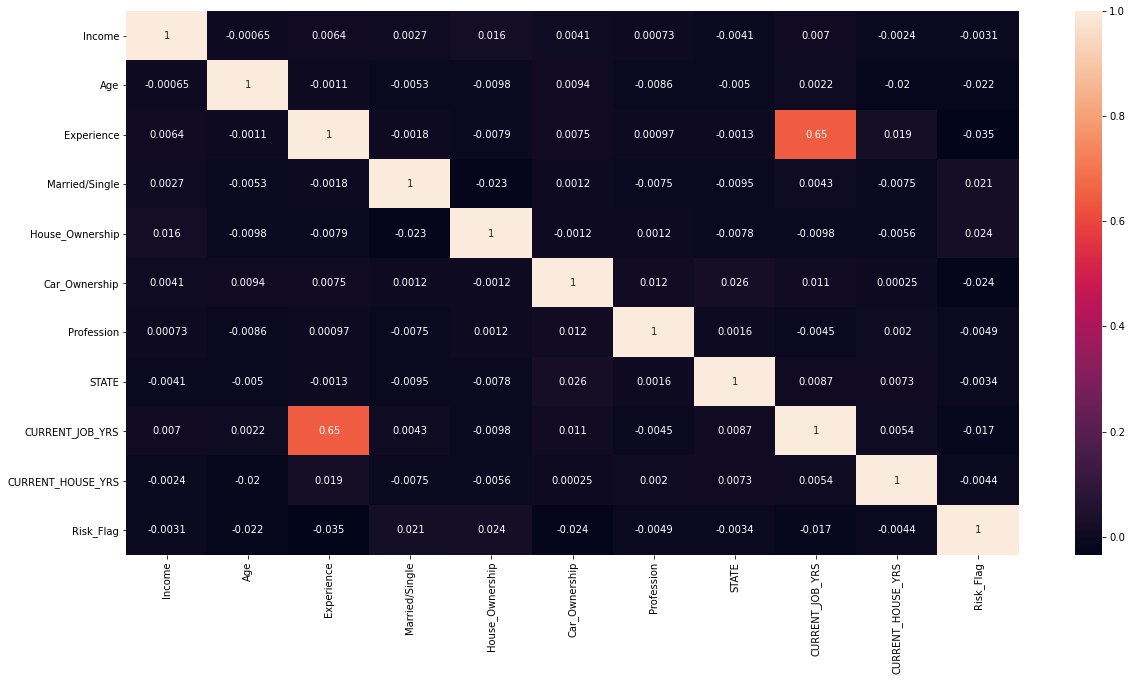

In [10]:
plt.figure(figsize = (20,10))
corrMatrix=new_dataset.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

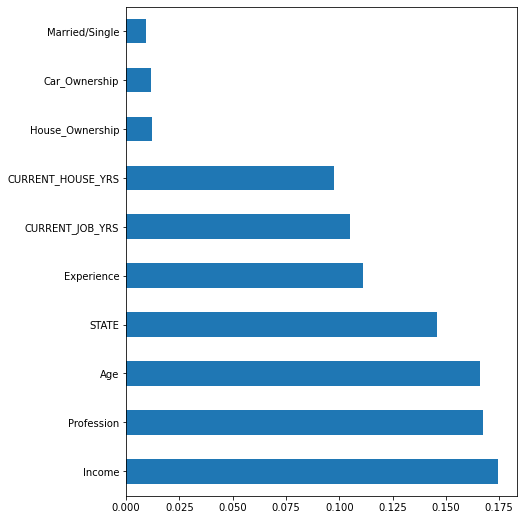

In [11]:
#Feature importances
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

plt.figure(figsize = (7,9))
imp = pd.Series(model.feature_importances_,index= X.columns)
imp.nlargest(30).plot(kind='barh')

plt.show()

<AxesSubplot:>

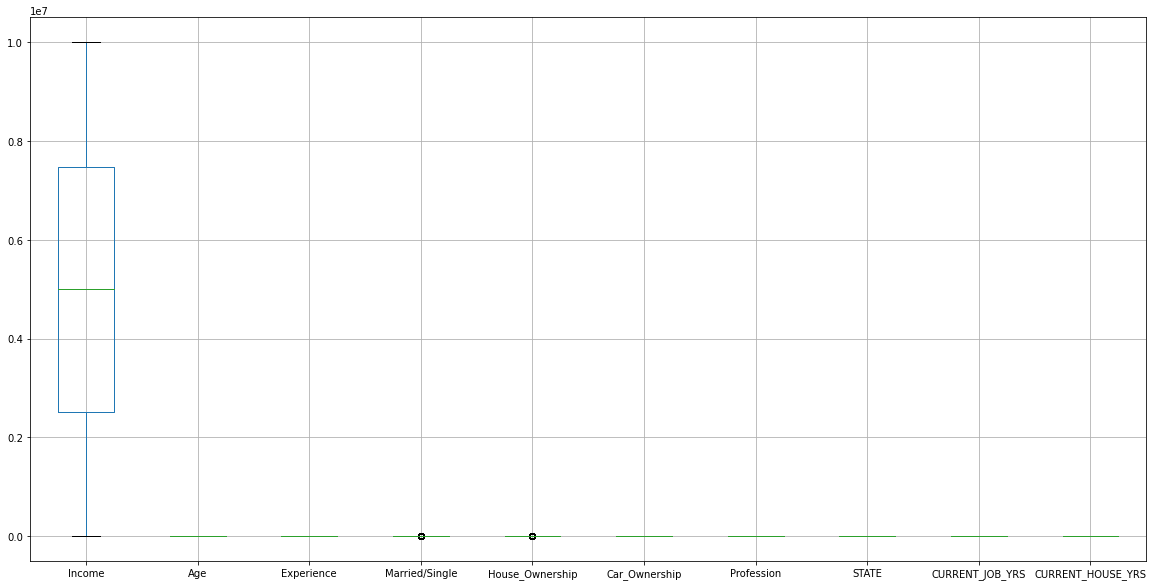

In [12]:
X.boxplot(figsize=(20,10))

# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

gini = DecisionTreeClassifier(criterion = "entropy",
            random_state = 880,max_depth=3, min_samples_leaf=5)
gini.fit(X_train, y_train)

y_pred = gini.predict(X_test)

print("The accuracy score of Random Forest Classifier is {}".format(accuracy_score(y_test, y_pred)))
print()
print("The AUC-ROC score is {}".format(roc_auc_score(y_test, y_pred)))

The accuracy score of Random Forest Classifier is 0.8773677248677249

The AUC-ROC score is 0.5


# Random Forest

In [40]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

# instantiate the classifier 
rfc = RandomForestClassifier(random_state=42)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

print("The accuracy score of Random Forest Classifier is {}".format(accuracy_score(y_test, y_pred)))
print()
print("Classification Report:")
print(classification_report(y_test, y_pred))
print()
print("The AUC-ROC score is {}".format(roc_auc_score(y_test, y_pred)))

The accuracy score of Random Forest Classifier is 0.898994708994709

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     66329
           1       0.60      0.54      0.57      9271

    accuracy                           0.90     75600
   macro avg       0.77      0.75      0.76     75600
weighted avg       0.90      0.90      0.90     75600


The AUC-ROC score is 0.7467045534396686


# Gradient Boost

In [41]:
#%%script false
# import classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

# instantiate the classifier 
rfc = GradientBoostingClassifier()

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

print("The accuracy score of Random Forest Classifier is {}".format(accuracy_score(y_test, y_pred)))
print()
print("Classification Report:")
print(classification_report(y_test, y_pred))
print()
print("The AUC-ROC score is {}".format(roc_auc_score(y_test, y_pred)))

The accuracy score of Random Forest Classifier is 0.877526455026455

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66329
           1       0.73      0.00      0.00      9271

    accuracy                           0.88     75600
   macro avg       0.80      0.50      0.47     75600
weighted avg       0.86      0.88      0.82     75600


The AUC-ROC score is 0.5009719334133349


# KNN

In [42]:
#%%script false
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

# instantiate the classifier 
rfc = KNeighborsClassifier(n_neighbors=5)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

print("The accuracy score of Random Forest Classifier is {}".format(accuracy_score(y_test, y_pred)))
print()
print("Classification Report:")
print(classification_report(y_test, y_pred))
print()
print("The AUC-ROC score is {}".format(roc_auc_score(y_test, y_pred)))

The accuracy score of Random Forest Classifier is 0.8880423280423281

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     66329
           1       0.55      0.48      0.51      9271

    accuracy                           0.89     75600
   macro avg       0.74      0.71      0.73     75600
weighted avg       0.88      0.89      0.88     75600


The AUC-ROC score is 0.7142970429878396
